<a href="https://colab.research.google.com/github/PaulToronto/Hands-on-Maching-Learning-Book/blob/main/1_The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Machine Learning Landscape

https://github.com/ageron/

https://github.com/ageron/data

## Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

## What Is Machine Learning?

*\[Machine learning is the\] field of study that gives computers the ability to learn without being explicitly programmed.*

Arthur Samuel, 1959

*A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.*

Tom Mitchell, 1997

## Life Satisfaction Example

In [2]:
lifesat_data = 'https://raw.githubusercontent.com/ageron/data/main/lifesat/lifesat.csv'

lifesat = pd.read_csv(lifesat_data)
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 776.0+ bytes


In [3]:
lifesat.shape

(27, 3)

In [4]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


### Visualize the Data

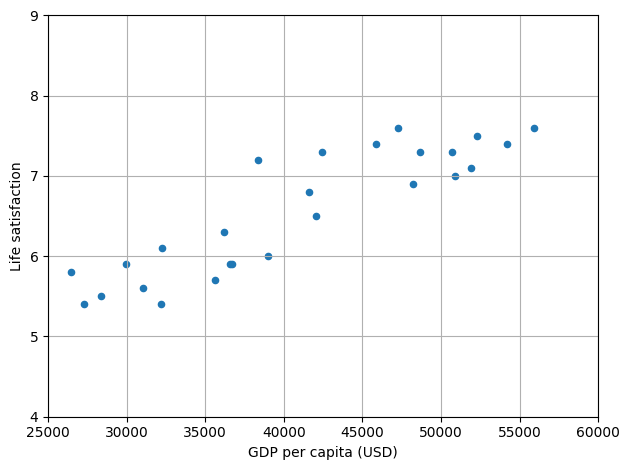

In [5]:
lifesat.plot(kind='scatter',
             x='GDP per capita (USD)',
             y='Life satisfaction',
             grid=True)
plt.axis([25_000, 60_000, 4, 9])
plt.tight_layout()
plt.show()

### Two Regression Models

#### `LinearRegression()`

In [6]:
X = lifesat[['GDP per capita (USD)']]
y = lifesat['Life satisfaction']

In [7]:
# select a model
lr_model = LinearRegression()
# train the model
lr_model.fit(X, y)

LinearRegression()

In [8]:
lr_model.coef_

array([6.77889969e-05])

In [9]:
lr_model.intercept_

3.7490494273769093

#### `KNeighborsRegressor(n_neighbors=3)`

In [10]:
# select a model
kn_model = KNeighborsRegressor()
# train the model
kn_model.fit(X, y)

KNeighborsRegressor()

#### Visualize the fit of each model

Includes the prediction for Cyprus which has a gdp of `$37,655.20 USD`

In [11]:
cyprus_gdp = [[37655.2]]

In [12]:
lr_fitted = lr_model.predict(X)
lr_cyprus_prediction = lr_model.predict(cyprus_gdp)
lr_fitted, lr_cyprus_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([5.54250143, 5.59881344, 5.67323928, 5.77814317, 5.85103495,
        5.93057761, 5.93444177, 6.16494226, 6.20405829, 6.22658399,
        6.23907722, 6.34816821, 6.39228805, 6.57091077, 6.59792388,
        6.62360074, 6.85762408, 6.95281169, 7.01715921, 7.05022695,
        7.18482109, 7.201025  , 7.26971192, 7.29303981, 7.42386138,
        7.54104476, 7.83236904]),
 array([6.30165767]))

In [13]:
kn_fitted = kn_model.predict(X)
kn_cyprus_prediction = kn_model.predict(cyprus_gdp)
kn_fitted, kn_cyprus_prediction

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


(array([5.64, 5.64, 5.64, 5.7 , 5.7 , 5.74, 5.74, 6.2 , 6.2 , 6.2 , 6.2 ,
        6.26, 6.36, 6.76, 6.76, 6.8 , 7.3 , 7.3 , 7.3 , 7.22, 7.24, 7.24,
        7.26, 7.26, 7.32, 7.3 , 7.3 ]),
 array([6.26]))

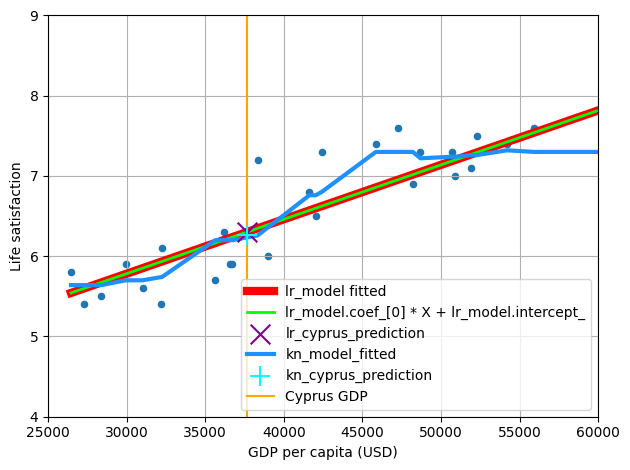

In [14]:
ax = lifesat.plot(kind='scatter',
             x='GDP per capita (USD)',
             y='Life satisfaction',
             grid=True)

plt.plot(lifesat['GDP per capita (USD)'],
         lr_fitted,
         color='red',
         linewidth=6,
         label='lr_model fitted')

plt.plot(lifesat['GDP per capita (USD)'],
         lr_model.coef_[0] * X + lr_model.intercept_,
         color='lime',
         linewidth=2,
         label='lr_model.coef_[0] * X + lr_model.intercept_')

plt.scatter(cyprus_gdp,
            lr_cyprus_prediction,
            color='purple',
            marker='x',
            s=200,
            label='lr_cyprus_prediction',
            zorder=100)

plt.plot(lifesat['GDP per capita (USD)'],
         kn_fitted,
         color='dodgerblue',
         linewidth=3,
         label='kn_model_fitted')

plt.scatter(cyprus_gdp,
            kn_cyprus_prediction,
            color='cyan',
            marker='+',
            s=200,
            label='kn_cyprus_prediction',
            zorder=101)

ax.axvline(cyprus_gdp, color='orange', label='Cyprus GDP')

plt.axis([25_000, 60_000, 4, 9])
plt.tight_layout()
plt.legend()
plt.show()

## Some Terminology

- ***Model***: the part of a machine learning system that learns and makes predictions
- ***Supervised learning***: the training set includes categorical labels or numeric targets
- ***Unsupervised learning***: there are no labels
- ***Semi-supervised learning***
- ***Self-supervised learning***
- ***Transfer learning***: transferring knowledge from one task to another
- ***Reinforcment learning***: an **agent** can observe the environment, select and perform actions and get **rewards** (or **penalties**). It must then learn by itself what is the best strategy, called a **policy** to get the most reward over time
- ***Batch learning***: the system is incapable of learning incrementally. It must be trained using all the available data. The system is trained and when launched ir runs without learning anymore. This is also called **offline learning**
- ***Online learning***: this is the opposite of batch learning. The system is trained incrementally.
- ***Instance-based learning***: the system learns the examples by heart, then, using a similary measure, classifies new examples
- ***Model-based learning***: uses a model to make predictions
- ***Feature selection***: selecting the most useful features to train on among existing features
- ***Feature extraction***: combining existing features to produce a more useful one
    - example: dimensionality reduction
- ***Hyperparameter***: a parameter of the learning algorithm (not of the model)
    - must be set prior to training and remains constant during training
- ***Overfitting***: the model performs well on the training data but does not generalize well
    - happens when the model is too complex relative to the amount of noisiness of the training data
    - possible solutions:
        - simplify the model
            - select one with fewer parameters (linear model rather than a high-degree polynomial model)
            - reduces the number of features from the training data
            - constrain the model (regularization, reduce degrees of freedom)
        - gather more training data
        - reduce the noise in the training data
            - fix data errors, remove outliers
- ***Underfitting***: occurs when the model is too simple to learn the underlying structure of the data
    - possible solutions:
        - select a more powerful model with more parameters
        - feed better features to the learning algorithm (feature engineering)
        - reduce the constraints on the model

## Testing and Validating

- training set
- test set
    - The error rate on new cases is called the ***generalization error*** or the ***out-of-sample error***
    - the test set gives an estimate of this error

## Hyperparameter Tuning and Model Selection

- validation set
- cross-validation